<a href="https://colab.research.google.com/github/Vivek2816/User-Profiling-and-Ad-Click-Prediction-Using-Machine-Learning/blob/main/User_Profiling_and_Ad_Click_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**User Profiling and Segmentation Using Machine Learning**
Codebeat Internship Program — Team: Vivek, Vikas, Sahishnav, Madhu kiran
mails-

1.Kagamahanthi Madhu Kiran Rao ----- kmkr656@gmail.com
2.Vivek Doddi----d.vvivek.28@gmail.com
3.Maddipati Aswini Sri Sahishnav-----sahishnavmaddipati@gmail.com
4. Palaparthi Venkata Vikas ----- pvvikas32@gmail.com

:

🎯 Project Objective
The objective of this project is to build a machine learning pipeline that performs user profiling and accurately predicts whether a user will click on an advertisement based on demographic and behavioral features. The project involves loading real-world user data from a CSV file, preprocessing it to handle categorical and numerical attributes, and applying a variety of supervised and unsupervised machine learning algorithms to analyze user behavior patterns.

The primary goals include:

Identifying the most relevant features influencing ad-click behavior.

Training and evaluating multiple machine learning models (e.g., Logistic Regression, SVM, Random Forest, Naive Bayes, KNN).

Applying dimensionality reduction techniques (PCA, t-SNE) for visualization and insight generation.

Assessing model performance using metrics like accuracy, precision, recall, and F1-score.

Demonstrating neural network-based classification using Keras.

This system can be extended to support real-time targeted advertising, user segmentation, and personalized recommendation engines.



In [ ]:
# ===== 1. Upload and Load CSV File (Colab only) =====

from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# Read uploaded file dynamically
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print("✅ File loaded:", filename)
print("\n📄 First few rows:")
print(df.head())

print("\n🧾 Column names:")
print(df.columns)


Saving user_profiles_for_ads (1).csv to user_profiles_for_ads (1) (10).csv
✅ File loaded: user_profiles_for_ads (1) (10).csv

📄 First few rows:
   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5           

In [ ]:
# ===== 2. Preprocessing =====

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Strip whitespaces from column names
df.columns = df.columns.str.strip()

# Selected columns
required_columns = ['Age', 'Gender', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Click-Through Rates (CTR)', 'Conversion Rates']
missing = [col for col in required_columns if col not in df.columns]

if missing:
    raise ValueError(f"Missing required columns: {missing}")

# Encode categorical columns
label_encoders = {}
for col in ['Age', 'Gender']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encode target if needed
# Assuming 'Conversion Rates' is the target variable for classification
# If not, please adjust the target variable accordingly
if df['Conversion Rates'].dtype == 'object':
    df['Conversion Rates'] = LabelEncoder().fit_transform(df['Conversion Rates'])

# Define features and label
X = df[required_columns[:-1]] # Using all required columns except the last one as features
y = df['Conversion Rates'] # Using 'Conversion Rates' as the target variable


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Preprocessing complete.")

✅ Preprocessing complete.


In [ ]:
# ===== 2. Linear Regression =====

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Mean Squared Error:", mse)
print("Linear Regression R-squared:", r2)

Linear Regression Mean Squared Error: 0.0007711728203862867
Linear Regression R-squared: -0.004818982244569003


In [ ]:
# ===== 3. K-Nearest Neighbors (KNN) =====

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("KNN Mean Squared Error:", mse)
print("KNN R-squared:", r2)

KNN Mean Squared Error: 0.000992129
KNN R-squared: -0.29271938232465433


In [ ]:
# ===== 4. Support Vector Machine (SVM) =====

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

model = SVR(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("SVM Mean Squared Error:", mse)
print("SVM R-squared:", r2)

SVM Mean Squared Error: 0.0007674750000000001
SVM R-squared: -8.143594372178597e-07


In [ ]:
# ===== 5. Decision Tree =====

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Mean Squared Error:", mse)
print("Decision Tree R-squared:", r2)

Decision Tree Mean Squared Error: 0.0017669200000000002
Decision Tree R-squared: -1.3022527625108005


In [ ]:
# ===== 6. Random Forest =====

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Mean Squared Error:", mse)
print("Random Forest R-squared:", r2)

Random Forest Mean Squared Error: 0.0008595601540000004
Random Forest R-squared: -0.11998547703954321


In [ ]:
# === Reload from original dataframe to avoid corrupted 'y' ===

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Just to be safe, reload the file if needed
# df = pd.read_csv(...)  ← if needed

# Strip column names (in case of extra spaces)
df.columns = df.columns.str.strip()

# Encode categorical features
le_gender = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])

# Define X and y again
X = df[['Age', 'Gender', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Click-Through Rates (CTR)']]
y = df['Conversion Rates']

# Train-test split again (fresh)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# ===== 8. K-Means Clustering =====

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

model = KMeans(n_clusters=3, random_state=42)
clusters = model.fit_predict(X)

print("K-Means Cluster Assignments:", clusters)
print("Adjusted Rand Score vs True Labels:", adjusted_rand_score(y, clusters))


K-Means Cluster Assignments: [0 2 2 0 0 0 2 1 1 1 0 1 1 0 0 2 0 2 2 2 2 0 0 0 0 2 2 2 0 2 1 0 0 2 1 2 2
 2 1 2 2 0 0 1 0 1 2 0 2 2 1 2 1 1 0 1 0 2 0 2 0 0 2 0 2 2 2 1 2 1 2 0 0 1
 1 1 1 2 2 2 1 1 2 2 2 2 1 2 1 0 2 1 1 0 1 2 0 0 0 0 0 2 0 2 2 2 0 1 2 0 2
 2 2 2 1 1 2 2 1 2 1 2 2 0 2 2 1 1 0 2 0 0 2 0 1 0 0 2 0 1 1 2 2 0 0 2 1 2
 0 0 2 2 2 0 1 2 1 1 0 1 2 2 2 0 2 1 0 2 0 0 1 0 2 2 2 2 2 0 1 2 0 2 1 2 2
 1 1 2 0 0 2 1 2 1 0 2 1 1 1 1 1 0 0 1 2 2 0 2 2 2 2 1 2 0 1 2 0 1 2 1 2 2
 0 0 2 0 1 0 1 1 2 2 0 0 0 1 0 0 1 0 2 2 1 0 0 1 0 1 1 1 2 0 2 0 2 2 1 1 0
 2 2 1 2 0 1 2 2 1 2 2 2 2 2 1 2 0 2 1 2 1 1 0 2 2 0 2 2 2 0 2 0 2 2 2 2 0
 1 0 1 2 2 2 0 1 1 1 0 2 1 2 0 2 2 2 2 2 2 2 0 0 0 2 1 2 2 1 0 2 0 2 0 2 0
 2 0 0 1 1 2 2 0 0 2 2 2 1 2 2 2 2 2 2 1 2 0 1 0 2 1 0 0 1 0 2 2 0 2 2 0 2
 2 0 0 2 2 0 1 0 2 0 0 2 1 1 2 2 0 2 1 1 1 0 2 1 2 1 2 2 2 1 0 1 2 1 2 2 0
 2 2 2 0 1 1 2 2 0 2 0 2 2 2 2 0 0 2 0 0 2 0 2 2 2 2 2 2 2 0 2 2 0 0 1 0 2
 2 1 1 1 2 0 2 0 0 1 0 2 0 2 2 2 2 2 1 0 1 2 2 1 0 1 2 1 0 1 2 2 0 2 1 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


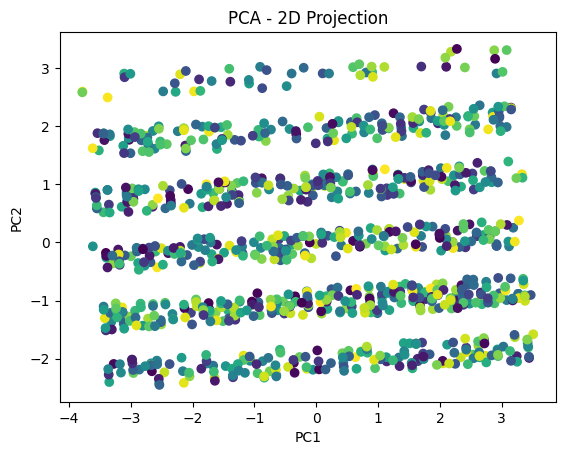

In [ ]:
# ===== 9. PCA (Principal Component Analysis) =====

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA - 2D Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


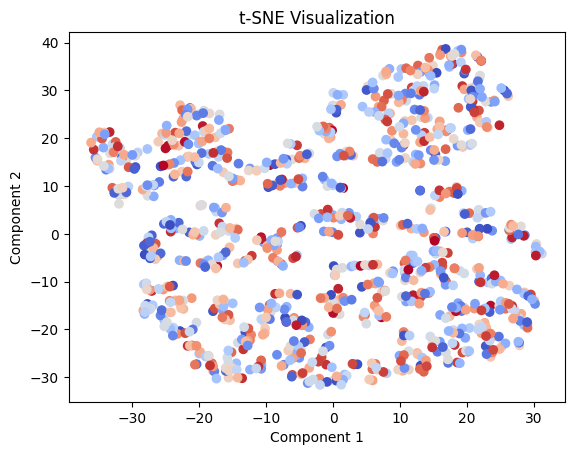

In [ ]:
# ===== 10. t-SNE Visualization =====

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm')
plt.title('t-SNE Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
